In [73]:
import torch
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('./data/balanced_sclaer_dataset_diabetes.csv')
data

,Unnamed: 0,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,0,0.000000,0.000000,1.000000,0.174419,1.000000,0.0,0.0,1.000000,1.000000,...,0.000000,0.250000,0.066667,0.000000,0.000000,0.000000,0.166667,0.600000,0.000000,0.0
1,1,0.000000,1.000000,1.000000,0.220930,1.000000,0.0,1.0,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.583333,0.800000,0.857143,2.0
2,2,0.000000,0.000000,1.000000,0.174419,0.000000,0.0,0.0,1.000000,0.000000,...,0.000000,0.500000,0.100000,0.000000,0.000000,0.000000,0.500000,0.600000,0.714286,0.0
3,3,0.000000,0.000000,1.000000,0.151163,1.000000,0.0,0.0,1.000000,1.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.500000,1.000000,0.857143,0.0
4,4,1.000000,1.000000,1.000000,0.209302,1.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.250000,0.600000,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105286,105286,1.000000,1.000000,1.000000,0.250595,0.775591,0.0,0.0,0.000000,0.000000,...,0.224409,0.806102,0.462599,0.500000,1.000000,0.775591,0.750000,0.955118,0.728909,1.0
105287,105287,1.000000,1.000000,1.000000,0.243025,0.900157,0.0,0.0,1.000000,0.099843,...,0.000000,1.000000,1.000000,1.000000,0.099843,0.000000,0.591654,0.619969,0.014263,1.0
105288,105288,1.000000,0.699485,1.000000,0.330221,0.699485,0.0,0.0,0.300515,1.000000,...,0.000000,0.424871,0.000000,0.000000,0.000000,1.000000,0.525043,0.600000,1.000000,1.0
105289,105289,0.508129,0.508129,1.000000,0.250095,0.508129,0.0,0.0,0.491871,0.508129,...,0.000000,0.372968,0.016396,0.066667,0.000000,0.000000,0.500000,1.000000,0.929733,1.0


In [75]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.isnull().sum().sum()


0

In [76]:
y = data["Diabetes_012"].values
X = data.drop(["Diabetes_012"], axis=1).values

In [77]:
# y = y.reshape(-1, 1)

In [78]:
# разбиваем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89497, 21), (15794, 21), (89497,), (15794,))

In [79]:
batch_size = 256

In [80]:
# а теперь преобразуем обучающую выборку в объект Dataset
train_ds = TensorDataset(torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(y_train).type(torch.long))
# для загрузки данных в ходе обучения мы создаем объект DataLoader на основе объекта Dataset
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [81]:
x_c, y_c = next(iter(train_dl))
x_c.shape, y_c.shape
# 128 - это указанный нами batch_size

(torch.Size([256, 21]), torch.Size([256]))

In [82]:
test_ds = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=True)

In [83]:
class MyClassifierModel(nn.Module):
    def __init__(self):
        super(MyClassifierModel, self).__init__()

        self.fc1 = nn.Linear(21, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(32, 3)
        # self.relu5 = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x= self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        # y = self.relu5(y)
        x = self.softmax(x)
        return x

In [84]:
model=MyClassifierModel()
print(model)

MyClassifierModel(
  (fc1): Linear(in_features=21, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=32, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [85]:
# определяем функцию потерь
loss = nn.NLLLoss()
# настраиваем оптимизатор и передаем туда параметры модели
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [86]:
epochs = 30

loss_values = []
for epoch in range(epochs):
    for x_b, y_b in train_dl:

        outputs = model(x_b)

        loss_value = loss(outputs, y_b)

        loss_value.backward()

        optimizer.step()

        optimizer.zero_grad()
    loss_values.append(loss_value.item())

    print(f'Эпоха {epoch + 1}, Значение функции потерь: {loss_value.item()}')

Эпоха 1, Значение функции потерь: 0.7353004217147827
Эпоха 2, Значение функции потерь: 0.6083232164382935
Эпоха 3, Значение функции потерь: 0.6061816215515137
Эпоха 4, Значение функции потерь: 0.5369599461555481
Эпоха 5, Значение функции потерь: 0.5640237331390381
Эпоха 6, Значение функции потерь: 0.47215524315834045
Эпоха 7, Значение функции потерь: 0.4772386848926544
Эпоха 8, Значение функции потерь: 0.4167726933956146
Эпоха 9, Значение функции потерь: 0.4781497120857239
Эпоха 10, Значение функции потерь: 0.4653061628341675
Эпоха 11, Значение функции потерь: 0.5625833868980408
Эпоха 12, Значение функции потерь: 0.4650493562221527
Эпоха 13, Значение функции потерь: 0.6361762285232544
Эпоха 14, Значение функции потерь: 0.40330377221107483
Эпоха 15, Значение функции потерь: 0.49500972032546997
Эпоха 16, Значение функции потерь: 0.4713437557220459
Эпоха 17, Значение функции потерь: 0.474682480096817
Эпоха 18, Значение функции потерь: 0.5096805095672607
Эпоха 19, Значение функции потерь: 

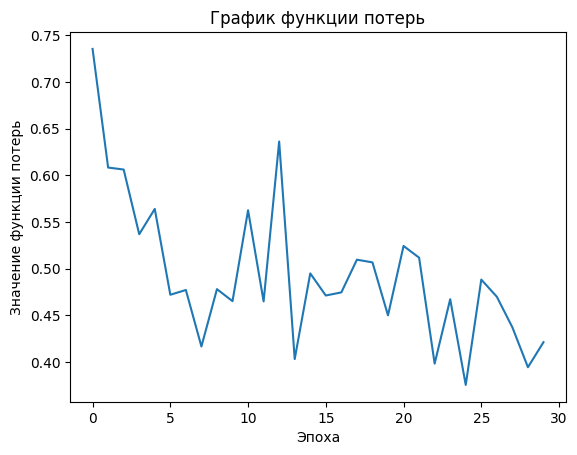

In [87]:
plt.plot(loss_values)
plt.xlabel('Эпоха')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь')
plt.show()

In [91]:
y_test

array([0., 1., 0., ..., 0., 1., 2.])

In [112]:
y_pred = model(torch.from_numpy(X_test).type(torch.float32))
y_pred

tensor([[-4.5002e-01, -4.4219e+00, -1.0488e+00],
        [-2.0067e+00, -9.0268e-01, -7.7633e-01],
        [-5.9575e-01, -4.2841e+00, -8.3226e-01],
        ...,
        [-2.4951e-01, -5.3646e+00, -1.5318e+00],
        [-5.5113e+00, -4.1201e-03, -9.5580e+00],
        [-1.8551e+00, -4.8450e+00, -1.7949e-01]],
       grad_fn=<LogSoftmaxBackward0>)

In [121]:
y_pred_arg = [torch.argmax(pred).numpy() for pred in y_pred]
y_pred_arg

[array(0, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(0, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_arg)) 

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      5268
         1.0       0.98      0.90      0.93      5245
         2.0       0.68      0.79      0.73      5281

    accuracy                           0.79     15794
   macro avg       0.80      0.79      0.79     15794
weighted avg       0.80      0.79      0.79     15794

